In [31]:
import pandas as pd
import numpy as np

# merging bertopic (kmeans), lsa, and original bertopic topics and similarity score results

In [32]:
label = 'spray'
subcategory = 'SPRAY CLEANERS BLEACH CLEANERS'
kmeans_bertopic = pd.read_csv(f'outputs/bertopic_{label}_kmeans.csv')
print(kmeans_bertopic.columns)
kmeans_bertopic.shape

Index(['review_text', 'topic', 'topic_number', 'star_rating', 'topic_words',
       'similarity_score'],
      dtype='object')


(4731, 6)

In [33]:
kmeans_bertopic.rename(columns={'topic': 'bertopic_topic', 'topic_number': 'bertopic_topic_number', 'topic_words':'bertopic_topic_words', 'similarity_score':'bertopic_similarity_score'}, inplace=True)

In [34]:
# move column 'star_rating' to front
cols = kmeans_bertopic.columns.tolist()
cols = [cols[3]] + cols[0:3] + cols[4:]
kmeans_bertopic = kmeans_bertopic[cols]

In [35]:
print(kmeans_bertopic.columns)

Index(['star_rating', 'review_text', 'bertopic_topic', 'bertopic_topic_number',
       'bertopic_topic_words', 'bertopic_similarity_score'],
      dtype='object')


In [36]:
lsa = pd.read_csv(f'outputs/lsa_{label}.csv')
print(lsa.columns)

Index(['star_rating', 'review_text', 'lsa_topic_number', 'lsa_topic_words',
       'lsa_topic', 'similarity_score'],
      dtype='object')


In [37]:
lsa.rename(columns={'similarity_score': 'lsa_similarity_score'}, inplace=True)

In [38]:
# merge bertopic and lsa using review_text, remove duplicate columns
merged = kmeans_bertopic.merge(lsa, on=['star_rating', 'review_text'], how='inner')
print(merged.shape)
merged.head()

(4731, 10)


,star_rating,review_text,bertopic_topic,bertopic_topic_number,bertopic_topic_words,bertopic_similarity_score,lsa_topic_number,lsa_topic_words,lsa_topic,lsa_similarity_score
0,1.0,my first time attempt to order this buster all...,"""Walmart order failed to ship or deliver""",1,order - item - receive - charge - ship - retur...,0.267979,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.137818
1,1.0,one bottle leak out into the box toss the enti...,Bleach leaks or defective packaging,0,bottle - product - bleach - leak - spray - box...,0.681846,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.536000
2,1.0,usually i like these product but the item spil...,Bleach leaks or defective packaging,0,bottle - product - bleach - leak - spray - box...,0.424873,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.328243
3,1.0,receive spilling in my bag,"""Walmart order failed to ship or deliver""",1,order - item - receive - charge - ship - retur...,0.268726,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.455039
4,1.0,package be receive in a home depot box with ob...,"""Walmart order failed to ship or deliver""",1,order - item - receive - charge - ship - retur...,0.417641,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.528656


In [39]:
og_bertopic = pd.read_csv('data/lotion+spray_bertopic_similarity_scores.csv')

In [40]:
og_kmeans_bertopic = og_bertopic[og_bertopic['subcategory'] == subcategory]

In [41]:
print(og_kmeans_bertopic.shape)

(4731, 11)


In [42]:
og_kmeans_bertopic_2 = og_kmeans_bertopic[['star_rating', 'review_text', 'topic', 'similarity_score']].copy()
og_kmeans_bertopic_2.rename(columns={'topic': 'og_bertopic_topic', 'similarity_score': 'og_bertopic_similarity_score'}, inplace=True)
og_kmeans_bertopic_2.head()

,star_rating,review_text,og_bertopic_topic,og_bertopic_similarity_score
0,5.0,it do the work that be enough for me,Finding the Perfect Product,0.145377
1,5.0,i use it in the restroom and in the kitchen fo...,Disinfectant spray recommendations and reviews...,0.382112
2,5.0,i use this in my shower that have pink mold an...,Effective products for mold and mildew removal...,0.503922
3,5.0,i appreciate the value you get with this 3pack...,Disinfectant spray recommendations and reviews...,0.456111
4,5.0,stay at a beach condo for several month last y...,Bathroom cleaning solutions,0.334184


In [43]:
# merge og_kmeans_bertopic_2 with merged using star_rating, review_text
merged = merged.merge(og_kmeans_bertopic_2, on=['star_rating', 'review_text'], how='inner')
merged.head()

,star_rating,review_text,bertopic_topic,bertopic_topic_number,bertopic_topic_words,bertopic_similarity_score,lsa_topic_number,lsa_topic_words,lsa_topic,lsa_similarity_score,og_bertopic_topic,og_bertopic_similarity_score
0,1.0,my first time attempt to order this buster all...,"""Walmart order failed to ship or deliver""",1,order - item - receive - charge - ship - retur...,0.267979,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.137818,Missing or undelivered orders,0.275828
1,1.0,one bottle leak out into the box toss the enti...,Bleach leaks or defective packaging,0,bottle - product - bleach - leak - spray - box...,0.681846,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.536000,Leaking and damaged products upon arrival,0.572836
2,1.0,usually i like these product but the item spil...,Bleach leaks or defective packaging,0,bottle - product - bleach - leak - spray - box...,0.424873,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.328243,Leaking and damaged products upon arrival,0.462335
3,1.0,receive spilling in my bag,"""Walmart order failed to ship or deliver""",1,order - item - receive - charge - ship - retur...,0.268726,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.455039,Leaking and damaged products upon arrival,0.458957
4,1.0,package be receive in a home depot box with ob...,"""Walmart order failed to ship or deliver""",1,order - item - receive - charge - ship - retur...,0.417641,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.528656,Leaking and damaged products upon arrival,0.676214


# average similarity score for each review

In [44]:
# get avg of bertopic_similarity_score, lsa_similarity_score, og_bertopic_similarity_score
merged['avg_similarity_score'] = merged[['bertopic_similarity_score', 'lsa_similarity_score', 'og_bertopic_similarity_score']].mean(axis=1)


# best similarity score for each review

In [45]:
merged['best_score'] = merged[['bertopic_similarity_score', 'lsa_similarity_score', 'og_bertopic_similarity_score']].max(axis=1)

In [46]:
# create three cols: lsa_best, bertopic_best, og_bertopic_best and set = 0 if method_similarity_score highest for that row
merged['lsa_best'] = 0
merged['bertopic_best'] = 0
merged['og_bertopic_best'] = 0

merged.loc[merged['lsa_similarity_score'] == merged['best_score'], 'lsa_best'] = 1
merged.loc[merged['bertopic_similarity_score'] == merged['best_score'], 'bertopic_best'] = 1
merged.loc[merged['og_bertopic_similarity_score'] == merged['best_score'], 'og_bertopic_best'] = 1
merged.head()

,star_rating,review_text,bertopic_topic,bertopic_topic_number,bertopic_topic_words,bertopic_similarity_score,lsa_topic_number,lsa_topic_words,lsa_topic,lsa_similarity_score,og_bertopic_topic,og_bertopic_similarity_score,avg_similarity_score,best_score,lsa_best,bertopic_best,og_bertopic_best
0,1.0,my first time attempt to order this buster all...,"""Walmart order failed to ship or deliver""",1,order - item - receive - charge - ship - retur...,0.267979,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.137818,Missing or undelivered orders,0.275828,0.227208,0.275828,0,0,1
1,1.0,one bottle leak out into the box toss the enti...,Bleach leaks or defective packaging,0,bottle - product - bleach - leak - spray - box...,0.681846,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.536000,Leaking and damaged products upon arrival,0.572836,0.596894,0.681846,0,1,0
2,1.0,usually i like these product but the item spil...,Bleach leaks or defective packaging,0,bottle - product - bleach - leak - spray - box...,0.424873,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.328243,Leaking and damaged products upon arrival,0.462335,0.405150,0.462335,0,0,1
3,1.0,receive spilling in my bag,"""Walmart order failed to ship or deliver""",1,order - item - receive - charge - ship - retur...,0.268726,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.455039,Leaking and damaged products upon arrival,0.458957,0.394241,0.458957,0,0,1
4,1.0,package be receive in a home depot box with ob...,"""Walmart order failed to ship or deliver""",1,order - item - receive - charge - ship - retur...,0.417641,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.528656,Leaking and damaged products upon arrival,0.676214,0.540837,0.676214,0,0,1


# method most often the best

In [47]:
# count number of times each method has highest similarity score
lsa_best_count = merged['lsa_best'].sum()
bertopic_best_count = merged['bertopic_best'].sum()
og_bertopic_best_count = merged['og_bertopic_best'].sum()

# print with labels
print(f'lsa_best_count: {lsa_best_count}')
print(f'bertopic_best_count: {bertopic_best_count}')
print(f'og_bertopic_best_count: {og_bertopic_best_count}')

lsa_best_count: 752
bertopic_best_count: 1456
og_bertopic_best_count: 2523


### bertopic best most often

## by rating

In [48]:
# count number of times each method has highest similarity score for each star_rating
lsa_best_count = merged.groupby('star_rating')['lsa_best'].sum()
bertopic_best_count = merged.groupby('star_rating')['bertopic_best'].sum()
og_bertopic_best_count = merged.groupby('star_rating')['og_bertopic_best'].sum()

# print with labels
print(f'lsa_best_count: {lsa_best_count}')
print(f'bertopic_best_count: {bertopic_best_count}')
print(f'og_bertopic_best_count: {og_bertopic_best_count}')

lsa_best_count: star_rating
1.0     35
2.0     20
3.0     28
4.0     64
5.0    605
Name: lsa_best, dtype: int64
bertopic_best_count: star_rating
1.0      71
2.0      25
3.0      72
4.0     161
5.0    1127
Name: bertopic_best, dtype: int64
og_bertopic_best_count: star_rating
1.0     166
2.0      52
3.0      65
4.0     195
5.0    2045
Name: og_bertopic_best, dtype: int64


In [49]:
colors = ['purple', '#1f77b4', 'pink']

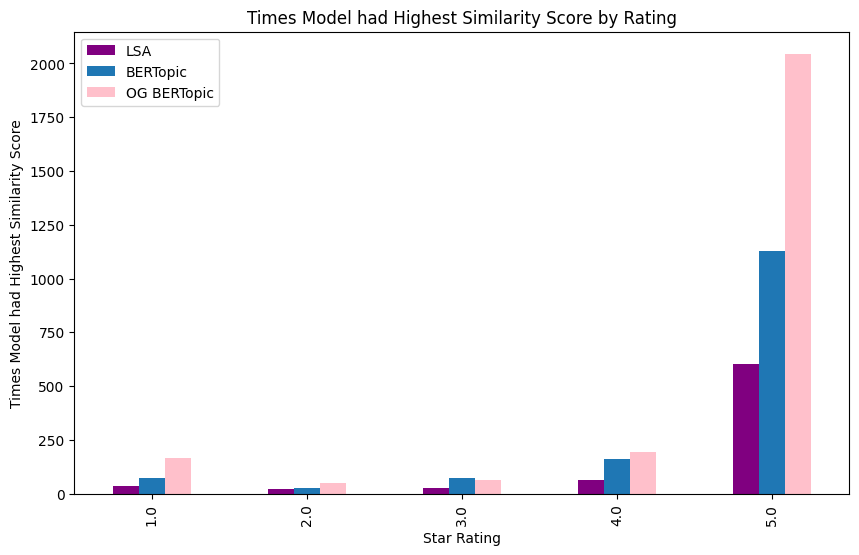

In [50]:
# plot barplot of number of times each method has highest similarity score for each star_rating
import matplotlib.pyplot as plt

# Create a DataFrame for plotting
performance_df = pd.DataFrame({
    'lsa_best_count': lsa_best_count,
    'bertopic_best_count': bertopic_best_count,
    'og_bertopic_best_count': og_bertopic_best_count
})

# Plot the bar plot
performance_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Times Model had Highest Similarity Score by Rating')
plt.xlabel('Star Rating')
plt.ylabel('Times Model had Highest Similarity Score')
plt.legend(['LSA', 'BERTopic', 'OG BERTopic'])
plt.show()

# average similarity score by rating

In [51]:
# get average similarity score for each star_rating for each method
lsa_avg_score = merged.groupby('star_rating')['lsa_similarity_score'].mean()
bertopic_avg_score = merged.groupby('star_rating')['bertopic_similarity_score'].mean()
og_bertopic_avg_score = merged.groupby('star_rating')['og_bertopic_similarity_score'].mean()

# print with labels
print(f'lsa_avg_score: {lsa_avg_score}')
print(f'bertopic_avg_score: {bertopic_avg_score}')
print(f'og_bertopic_avg_score: {og_bertopic_avg_score}')

lsa_avg_score: star_rating
1.0    0.268029
2.0    0.325370
3.0    0.358027
4.0    0.416161
5.0    0.433665
Name: lsa_similarity_score, dtype: float64
bertopic_avg_score: star_rating
1.0    0.326310
2.0    0.357816
3.0    0.432042
4.0    0.448519
5.0    0.453949
Name: bertopic_similarity_score, dtype: float64
og_bertopic_avg_score: star_rating
1.0    0.382903
2.0    0.424035
3.0    0.437582
4.0    0.469531
5.0    0.500064
Name: og_bertopic_similarity_score, dtype: float64


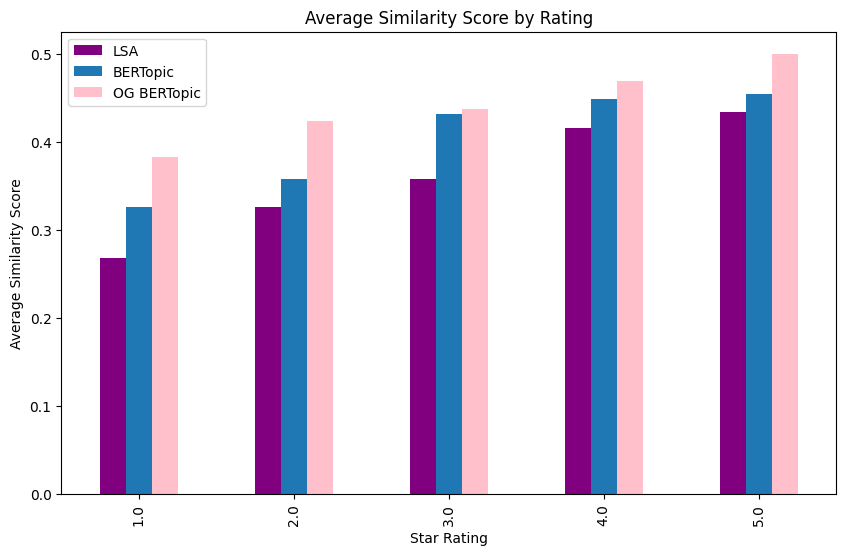

In [52]:
# plot barplot of average similarity score for each star_rating for each method
# Create a DataFrame for plotting
avg_ss_df = pd.DataFrame({
    'lsa_avg_score': lsa_avg_score,
    'bertopic_avg_score': bertopic_avg_score,
    'og_bertopic_avg_score': og_bertopic_avg_score
})

# Plot the bar plot
avg_ss_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Similarity Score by Rating')
plt.xlabel('Star Rating')
plt.ylabel('Average Similarity Score')
plt.legend(['LSA', 'BERTopic', 'OG BERTopic'])
plt.show()

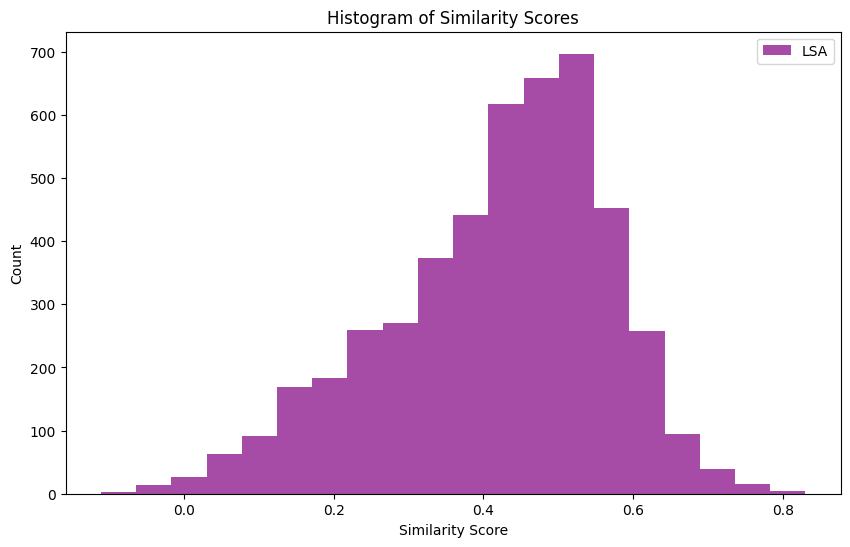

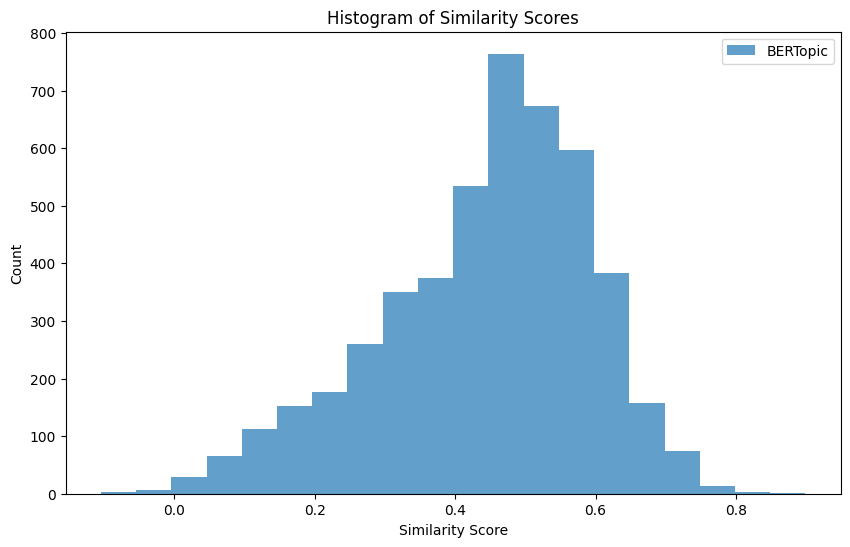

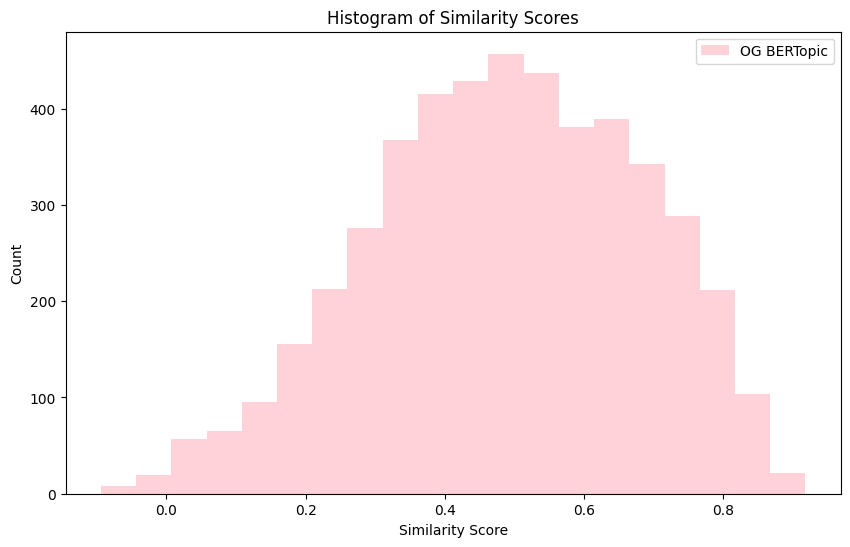

In [53]:
# overlay histograms of avg_similarity_score for each methodplt.clf()
def histogram(column, label, color):
    plt.figure(figsize=(10, 6))
    plt.hist(merged[column], bins=20, alpha=0.7, label=label, color=color)
    # plt.hist(merged['bertopic_similarity_score'], bins=20, alpha=0.5, label='BERTopic', color=colors[1])
    # plt.hist(merged['og_bertopic_similarity_score'], bins=20, alpha=0.3, label='OG BERTopic', color=colors[2])
    plt.title('Histogram of Similarity Scores')
    plt.xlabel('Similarity Score')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

histogram('lsa_similarity_score', 'LSA', colors[0])
histogram('bertopic_similarity_score', 'BERTopic', colors[1])
histogram('og_bertopic_similarity_score', 'OG BERTopic', colors[2])

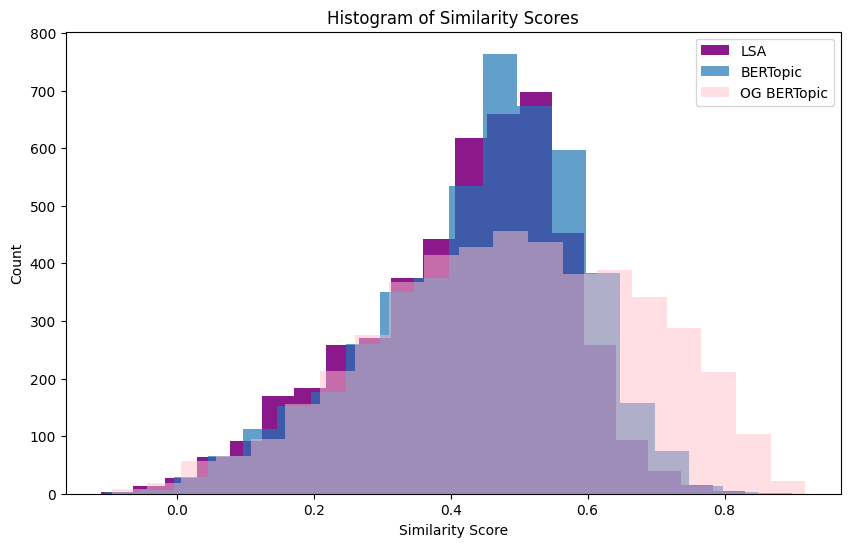

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(merged['lsa_similarity_score'], bins=20, alpha=0.9, label='LSA', color='purple')
plt.hist(merged['bertopic_similarity_score'], bins=20, alpha=0.7, label='BERTopic', color=colors[1])
plt.hist(merged['og_bertopic_similarity_score'], bins=20, alpha=0.5, label='OG BERTopic', color='pink')
plt.title('Histogram of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Count')
plt.legend()
plt.show()

# save merged df to csv

In [55]:
merged.head()

,star_rating,review_text,bertopic_topic,bertopic_topic_number,bertopic_topic_words,bertopic_similarity_score,lsa_topic_number,lsa_topic_words,lsa_topic,lsa_similarity_score,og_bertopic_topic,og_bertopic_similarity_score,avg_similarity_score,best_score,lsa_best,bertopic_best,og_bertopic_best
0,1.0,my first time attempt to order this buster all...,"""Walmart order failed to ship or deliver""",1,order - item - receive - charge - ship - retur...,0.267979,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.137818,Missing or undelivered orders,0.275828,0.227208,0.275828,0,0,1
1,1.0,one bottle leak out into the box toss the enti...,Bleach leaks or defective packaging,0,bottle - product - bleach - leak - spray - box...,0.681846,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.536000,Leaking and damaged products upon arrival,0.572836,0.596894,0.681846,0,1,0
2,1.0,usually i like these product but the item spil...,Bleach leaks or defective packaging,0,bottle - product - bleach - leak - spray - box...,0.424873,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.328243,Leaking and damaged products upon arrival,0.462335,0.405150,0.462335,0,0,1
3,1.0,receive spilling in my bag,"""Walmart order failed to ship or deliver""",1,order - item - receive - charge - ship - retur...,0.268726,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.455039,Leaking and damaged products upon arrival,0.458957,0.394241,0.458957,0,0,1
4,1.0,package be receive in a home depot box with ob...,"""Walmart order failed to ship or deliver""",1,order - item - receive - charge - ship - retur...,0.417641,0,"damage leak, time, item, work, arrive, bottle ...","""Bottles leak or arrive damaged upon delivery.""",0.528656,Leaking and damaged products upon arrival,0.676214,0.540837,0.676214,0,0,1


In [56]:
merged.to_csv('outputs/lsa+kmeans_bertopic.csv', index=False)

In [57]:
lsa[lsa['lsa_topic'].str.contains('scent exp')]

,star_rating,review_text,lsa_topic_number,lsa_topic_words,lsa_topic,lsa_similarity_score


In [58]:
# view rating, topic, count, avg_similarity_score for each topic for each method
def get_topic_info(df, method):
    topic_info = df.groupby(f'{method}_topic').agg(
        count=pd.NamedAgg(column='star_rating', aggfunc='count'),
        avg_similarity_score=pd.NamedAgg(column='lsa_similarity_score', aggfunc='mean')
    ).reset_index()
    # add star_rating column by getting star_rating values for each topic
    topic_info['star_rating'] = df.groupby(f'{method}_topic')['star_rating'].unique().values
    # convert star_rating to int
    topic_info['star_rating'] = topic_info['star_rating'].apply(lambda x: x[0])
    # sort by star_rating increasing, count decreasing
    topic_info = topic_info.sort_values(by=['star_rating', 'count'], ascending=[True, False]).reset_index(drop=True)
    return topic_info

lsa_topic_info = get_topic_info(merged, 'lsa')
# print so that lsa_topic is not truncated
pd.set_option('display.max_colwidth', None)

bertopic_topic_info = get_topic_info(merged, 'bertopic')

og_bertopic_topic_info = get_topic_info(merged, 'og_bertopic')



In [59]:
lsa_topic_info

,lsa_topic,count,avg_similarity_score,star_rating
0,"""Bottles leak or arrive damaged upon delivery.""",256,0.254409,1.0
1,"""Leaking bottles and damaged products upon arrival""",16,0.485948,1.0
2,"""Sprayer works, but leakers and damaged packaging issues""",86,0.299284,2.0
3,"""Defective sprayer doesn't work as expected""",11,0.529310,2.0
4,"""Effective Clorox bleach product works well in cleaning and spraying""",129,0.329905,3.0
5,"""Strong scent, but effective cleaning despite bleach smell""",36,0.458797,3.0
6,"""Effective and strong Clorox cleaner for bathroom tasks""",387,0.424572,4.0
7,"""Easy-to-use and strong product, with only minor leaking issues""",33,0.317516,4.0
8,"""Great kitchen and bathroom cleaner with pleasant smell and effective results""",3777,0.433665,5.0


In [60]:
og_bertopic_topic_info

,og_bertopic_topic,count,avg_similarity_score,star_rating
0,Disinfectant spray recommendations and reviews (undetermined topic),1399,0.409653,1.0
1,Review and recommendation for Clorox cleaning products,737,0.459943,1.0
2,Leaking and damaged products upon arrival,320,0.327783,1.0
3,Bathroom cleaner effectiveness and recommendations,155,0.517806,1.0
4,Bleach-based cleaning products and their effectiveness,139,0.491740,1.0
...,...,...,...,...
375,Value for money in purchasing decisions,1,0.207645,5.0
376,Versatile cleaning product,1,0.559507,5.0
377,Versatility and effectiveness of Pine Sol cleaner,1,0.615642,5.0
378,Versatility of a product,1,0.272706,5.0


In [61]:
bertopic_topic_info

,bertopic_topic,count,avg_similarity_score,star_rating
0,Bleach leaks or defective packaging,189,0.303830,1.0
1,"""Walmart order failed to ship or deliver""",83,0.186505,1.0
2,"""Spray bottle cleaning product with okay scent and work""\n\n(waiting for further confirmation that this meets your requirements)",52,0.343643,2.0
3,"""Defective or damaged product upon arrival""",45,0.304254,2.0
4,Effective cleaning spray with pleasant smell,101,0.452361,3.0
5,"""Bottle leak issues in package arrive""",64,0.209155,3.0
6,Bleach product smells great after use in bathroom.,287,0.502844,4.0
7,"""Bottle and spray product works well, good price for refill orders""",133,0.229108,4.0
8,"""Effective cleaning product with pleasant smell""",3777,0.433665,5.0


# og bertopic without undetermined topics vs with

In [65]:
# average similarity score for og_bertopic without topic containing 'undetermined'
merged[~merged['og_bertopic_topic'].str.contains('undetermined')]['og_bertopic_similarity_score'].mean()

np.float64(0.5476060523297719)

In [66]:
# average similarity score by rating for og_bertopic without topic containing 'undetermined'
merged[~merged['og_bertopic_topic'].str.contains('undetermined')].groupby('star_rating')['og_bertopic_similarity_score'].mean()

star_rating
1.0    0.440133
2.0    0.469009
3.0    0.492727
4.0    0.527155
5.0    0.563099
Name: og_bertopic_similarity_score, dtype: float64

In [67]:
# average similarity score for og_bertopic with topic containing 'undetermined'
merged['og_bertopic_similarity_score'].mean()

np.float64(0.48687920127038675)